In [464]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

### Simulate phone dataset

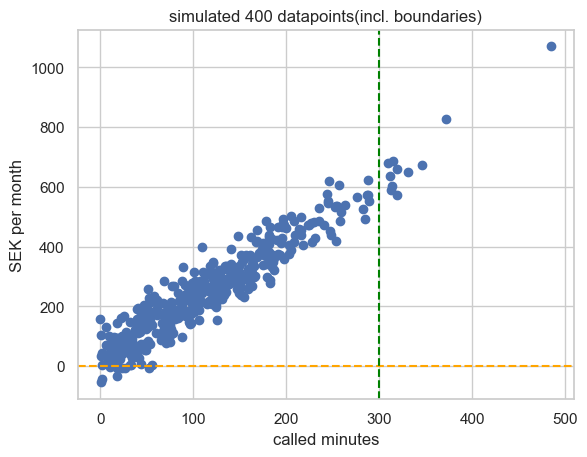

In [465]:
# excersise a)
np.random.seed(42)

x = np.random.normal(100, 100, size=400)
e = np.random.normal(0, 50, size=400)

x = np.abs(x)

y = 2*x + 25 + e

plt.scatter(x, y)
plt.title("simulated 400 datapoints(incl. boundaries)")
plt.xlabel("called minutes")
plt.ylabel("SEK per month")
plt.axhline(y=0, color="orange", linestyle="--")
plt.axvline(x=300, color="green", linestyle="--")

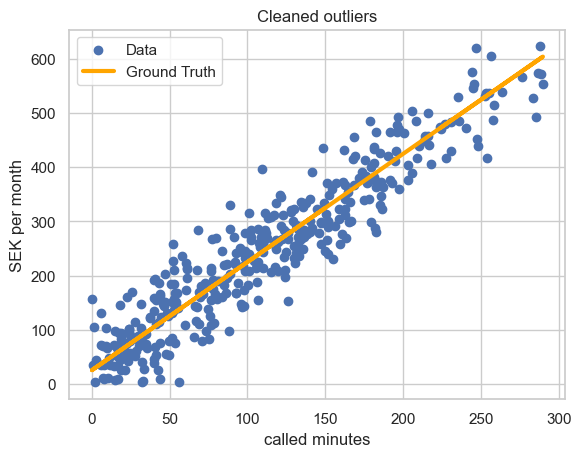

In [466]:
# excerise b)
under_300 = (x < 300) & (y > 0)

x = x[under_300]
y = y[under_300]

plt.scatter(x, y)
plt.plot(x,25 + 2 * x, color="orange", linewidth=3)
plt.title("Cleaned outliers")
plt.xlabel("called minutes")
plt.ylabel("SEK per month")
plt.legend(("Data", "Ground Truth"), loc="upper left")

In [467]:
df = pd.DataFrame({"minutes": x, "costs": y})
df

,minutes,costs
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051
...,...,...
376,53.082435,183.822512
377,71.313453,165.649148
378,235.387237,529.849510
379,88.546015,203.507950


### Train/test split

In [468]:
# excersise a)
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = 0.7, random_state: int = 42, replace: bool = False) -> tuple:
    
    train_fraction = int(len(X)* train_fraction)
    X_train = X.sample(n=train_fraction, random_state=random_state, replace=replace)
    y_train = y.sample(n=train_fraction, random_state=random_state, replace=replace)

    X_test = X.drop(X_train.index)
    y_test = y.drop(X_train.index)

    X_train, y_train = pd.DataFrame(X_train), pd.DataFrame(y_train)
    X_test, y_test = pd.DataFrame(X_test), y_test

    #X_train.insert(0, "Intercept", 1)
    #X_test.insert(0, "Intercept", 1)

    return X_train, X_test, y_train, y_test



In [469]:
# Excerisise b)
df_X = df["minutes"]
df_y = df["costs"]

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_fraction=0.7, random_state=42, replace=False)

print(f"Using default 0.7:\n")
print(f"length of X_train: {len(X_train)}")
print(f"length of X_test: {len(X_test)}")
print(f"length of y_train: {len(y_train)}")
print(f"length of y_test: {len(y_test)}")

Using default 0.7:

length of X_train: 266
length of X_test: 115
length of y_train: 266
length of y_test: 115


In [470]:
X_train.head()
#print(len(X_train))

,minutes
266,39.978312
192,11.614256
46,53.936123
55,193.128012
57,69.078762


In [471]:
print(np.shape(X_train))
print(np.shape(y_train))
y_train.head()


(266, 1)
(266, 1)


,costs
266,192.570147
192,34.734766
46,151.202158
55,371.612382
57,111.395409


###  Simple linear regression with normal equation

In [472]:
#X_train = X_train.to_numpy()
#y_train = y_train.to_numpy()

In [473]:
type(X_train)

pandas.core.frame.DataFrame

In [474]:

beta_1, beta_0 = np.polyfit(X_train["minutes"], y_train, deg=1)

In [494]:
beta_1, beta_0 = np.polyfit(X_train.values.flatten(), y_train.values.flatten(), deg=1)

predict = lambda X, weights: X @ weights

# beta_hat_0 = beta_0
# beta_hat_1 = beta_1

regression_line = lambda x: beta_0 + (beta_1 * x)

reg_line = regression_line(X_train)

,minutes
266,108.600279
192,54.410583
46,135.266759
55,401.193686
57,164.196861
...,...
41,256.012080
294,467.370703
206,440.222556
254,175.018774


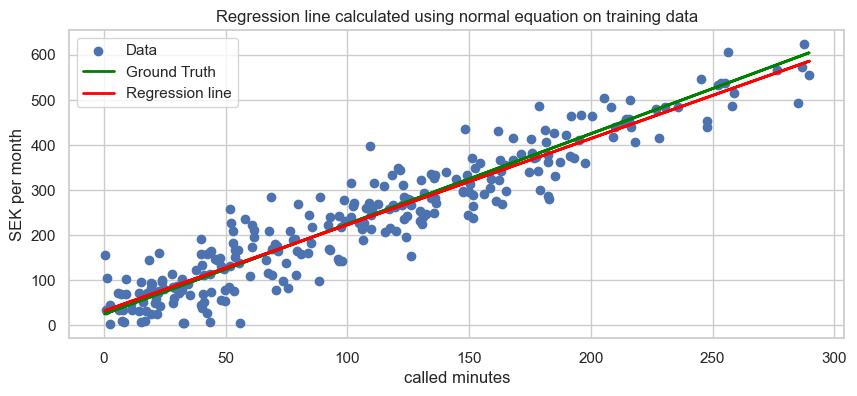

In [476]:
plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train)
plt.plot(X_train, 25 + 2 * X_train, color="green", linewidth=2)
plt.plot(X_train, reg_line["minutes"], color="red", linewidth=2)
plt.title("Regression line calculated using normal equation on training data")
plt.xlabel("called minutes")
plt.ylabel("SEK per month")
plt.legend(("Data", "Ground Truth", "Regression line"), loc="upper left")

### Prediction and evaluation

In [505]:
y_pred = X_test * beta_1 + beta_0

C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_23180\2544242121.py:4: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Test data", "Prediction", loc="upper left")


Text(0, 0.5, 'costs (kr)')

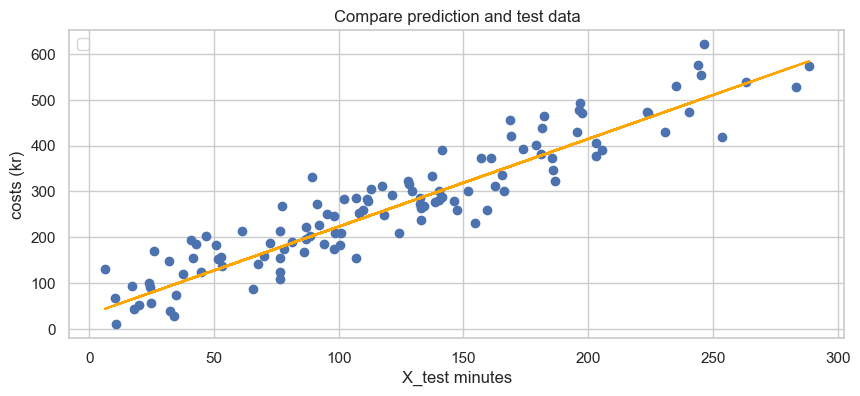

In [507]:
plt.figure(figsize=(10, 4))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color="orange")
plt.legend("Test data", "Prediction", loc="upper left")
plt.title("Compare prediction and test data")
plt.xlabel("X_test minutes")
plt.ylabel("costs (kr)")

In [512]:
# excersise b)
m = len(y_test, )
y_pred = np.reshape(y_pred, (m))

MAE = np.divide(1, m) * np.sum(np.abs(y_test - y_pred))
MSE = np.divide(1, m) * np.sum(np.square(y_test - y_pred))
RMSE = np.sqrt(MSE)

# Printing the results
print(f"Mean Absolute Error on Testing Data: {MAE:.2f} kr")
print(f"Mean Squared Error on Testing Data: {MSE:.2f} kr^2")
print(f"Root Mean Squared Error on Testing Data: {RMSE:.2f} kr")

Mean Absolute Error on Testing Data: 40.12 kr
Mean Squared Error on Testing Data: 2401.58 kr^2
Root Mean Squared Error on Testing Data: 49.01 kr


### Simulate more explanatory variables

In [513]:
# Excersise a)
np.random.seed(42)

x1 = np.absolute(np.random.normal(100, 100, size=10000))
x2 = np.random.uniform(0, 50, size=10000)
x3 = np.absolute(np.random.normal(0, 2, size=10000))

ep = np.random.normal(0, 50, size=10000)

y = 25 + (2*x1) + (0.5*x2) + (50*x3) + ep

data = pd.DataFrame({'Intercept': np.ones(10000), 'Minutes': x1, 'SMS': x2, 'Surf(GB)': x3, 'cost': y})
print(data.head())

   Intercept     Minutes        SMS  Surf(GB)        cost
0        1.0  149.671415  16.062759  0.958919  397.262506
1        1.0   86.173570   5.150960  2.056136  282.885394
2        1.0  164.768854   3.590377  1.004004  458.575762
3        1.0  252.302986   4.713799  3.413725  665.771078
4        1.0   76.584663  29.143468  0.535679  154.615402


Text(0.5, 1.0, 'Cost')

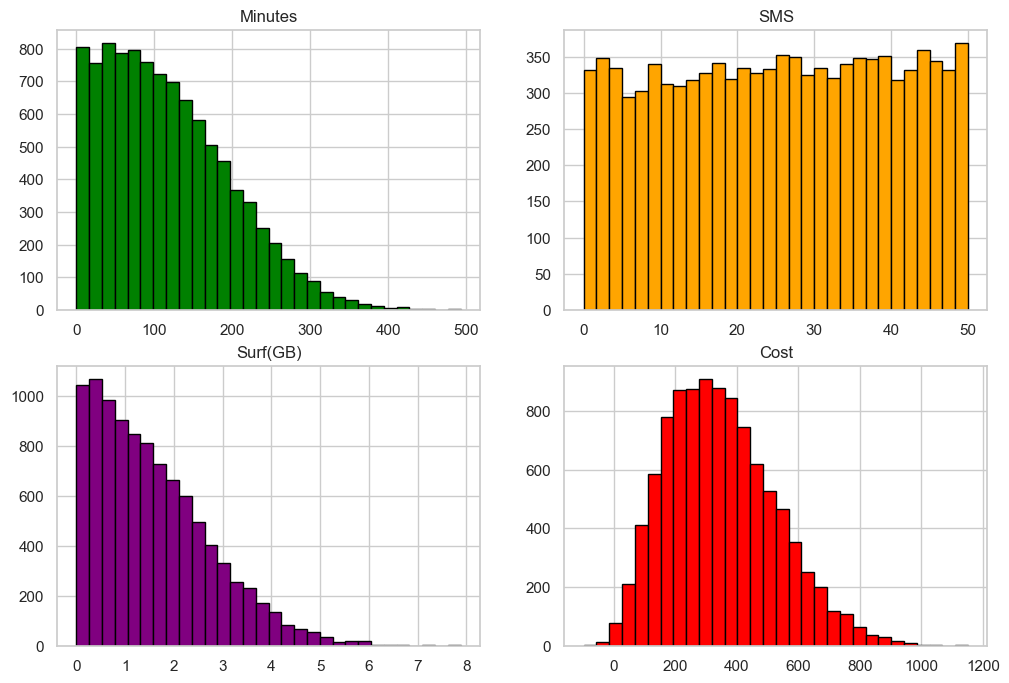

In [520]:
# Excersise b)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].hist(data['Minutes'], bins=30, color='green', edgecolor='black')
axes[0, 0].set_title('Minutes')

axes[0, 1].hist(data['SMS'], bins=30, color='orange', edgecolor='black')
axes[0, 1].set_title('SMS')

axes[1, 0].hist(data['Surf(GB)'], bins=30, color='purple', edgecolor='black')
axes[1, 0].set_title('Surf(GB)')

axes[1, 1].hist(data['cost'], bins=30, color='red', edgecolor='black')
axes[1, 1].set_title('Cost')

In [521]:
# Excersise c)
cleaned_data = data[(data['Surf(GB)'] < 4) & (data['Minutes'] < 300) & (data['cost'] > 0)]

Text(0.5, 1.0, 'Cost')

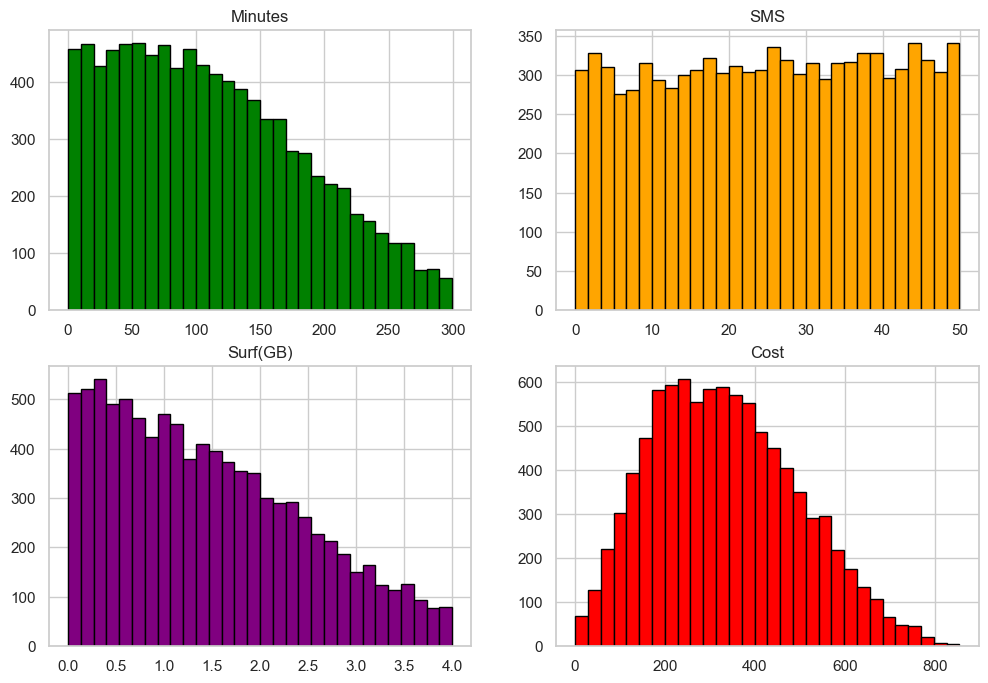

In [522]:
# Excersise d)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0, 0].hist(cleaned_data['Minutes'], bins=30, color='green', edgecolor='black')
axes[0, 0].set_title('Minutes')

axes[0, 1].hist(cleaned_data['SMS'], bins=30, color='orange', edgecolor='black')
axes[0, 1].set_title('SMS')

axes[1, 0].hist(cleaned_data['Surf(GB)'], bins=30, color='purple', edgecolor='black')
axes[1, 0].set_title('Surf(GB)')

axes[1, 1].hist(cleaned_data['cost'], bins=30, color='red', edgecolor='black')
axes[1, 1].set_title('Cost')

### Multiple linear regression

In [527]:
# Excersise a)
X = df.drop("costs", axis=1)
y = df["costs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_fraction=0.2, random_state=42, replace=False)

In [541]:
regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y

beta_hat = regression_fit(X_train, y_train)

predict = lambda X, weights: X @ weights

y_hat = predict(X_test.to_numpy(), np.reshape(beta_hat.to_numpy(), (1, 1)))

In [543]:
# Excersise c)
m = len(y_test)
y_hat = np.reshape(y_hat, (m))

MAE = np.divide(1, m) * np.sum(np.abs(y_test - y_hat))
MSE = np.divide(1, m) * np.sum(np.square(y_test - y_hat))
RMSE = np.sqrt(MSE)

# Printing the results
print(f"Mean Absolute Error: {MAE:.2f}")
print(f"Mean Squared Error: {MSE:.2f}")
print(f"Root Mean Squared Error: {RMSE:.2f}")

Mean Absolute Error: 41.98
Mean Squared Error: 2745.30
Root Mean Squared Error: 52.40


In [547]:
# Excersise d)
sample_size = [10, 100, 1000, 10000, 100000, 1000000]
rmse_values = []

for size in sample_size:
    # Perform regression and prediction
    beta_hat = regression_fit(X_train, y_train)
    y_hat = predict(X_test, beta_hat)

    # Calculate RMSE
    mse = MSE(y_test, y_pred)
    rmse = np.sqrt(mse)

    rmse_values.append(rmse)


ValueError: matrices are not aligned